# Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Loading & Viewing The DataSet

In [2]:
df=pd.read_csv('../Mall Customer Segmentation/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
X=df.iloc[:,[3,4]].values

In [9]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Elbow Method

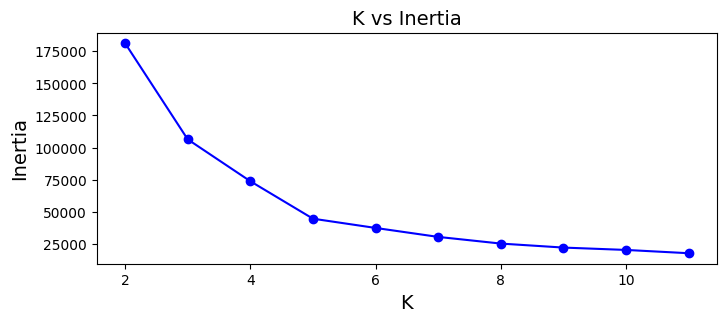

In [27]:
K_Inertia={}

for k in np.arange(2,12,1):
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(X)
    kM_iner=kmeans.inertia_
    K_Inertia[k]=kM_iner

plt.figure(figsize=(8,3))
plt.plot(K_Inertia.keys(),K_Inertia.values(),'bo-')
plt.title('K vs Inertia',fontsize=14,c='k')
plt.xlabel('K',fontsize=14,c='k')
plt.ylabel('Inertia',fontsize=14,c='k')
plt.show()

# Silhouette Method

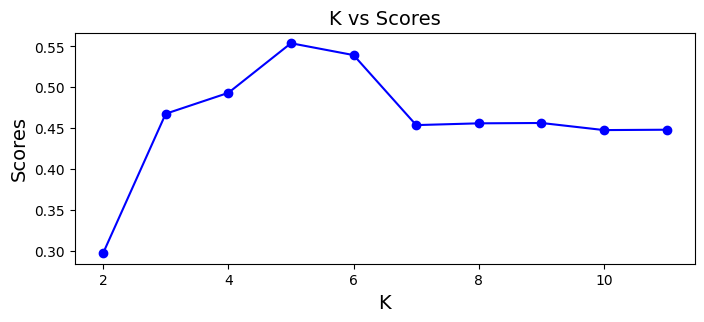

In [28]:
K_score={}

for k in np.arange(2,12,1):
    kmeans=KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X)
    kM_score=silhouette_score(X,kmeans.labels_)
    K_score[k]=kM_score

plt.figure(figsize=(8,3))
plt.plot(K_score.keys(),K_score.values(),'bo-')
plt.title('K vs Scores',fontsize=14,c='k')
plt.xlabel('K',fontsize=14,c='k')
plt.ylabel('Scores',fontsize=14,c='k')
plt.show()

* < ' The optimal Clusters are 5 !''

In [36]:
kmeans_5=KMeans(n_clusters=5,n_init=10)
y=kmeans_5.fit_predict(X)

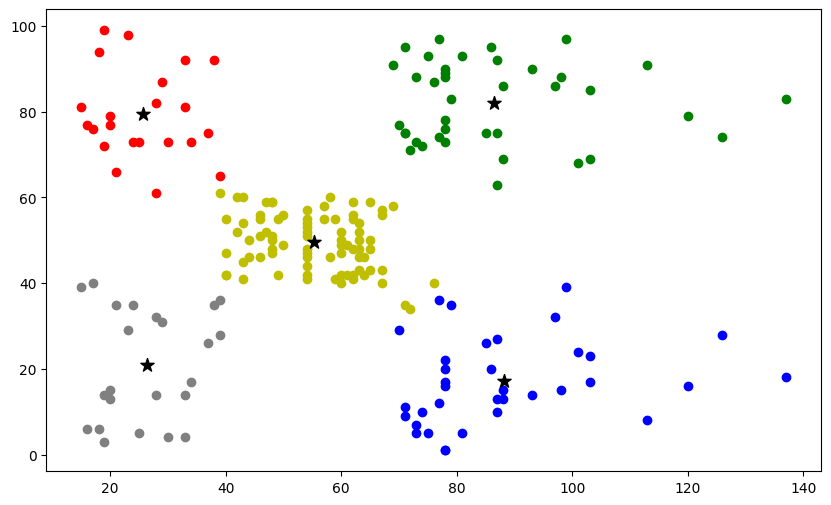

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(X[y==0][:,0],X[y==0][:,1],c='r')
plt.scatter(X[y==1][:,0],X[y==1][:,1],c='y')
plt.scatter(X[y==2][:,0],X[y==2][:,1],c='g')
plt.scatter(X[y==3][:,0],X[y==3][:,1],c='b')
plt.scatter(X[y==4][:,0],X[y==4][:,1],c='gray')

cen=kmeans_5.cluster_centers_

plt.scatter(cen[:,0],cen[:,1],s=100,marker='*',c='k')

In [41]:
X.shape

(200, 2)

In [42]:
y.shape

(200,)

In [46]:
X[y==2][:0]

array([], shape=(0, 2), dtype=int64)